# **Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")

2024-06-09 20:09:35.326091: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-09 20:09:35.326195: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-09 20:09:35.459405: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


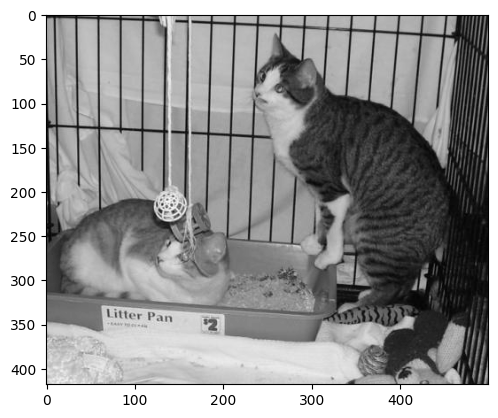

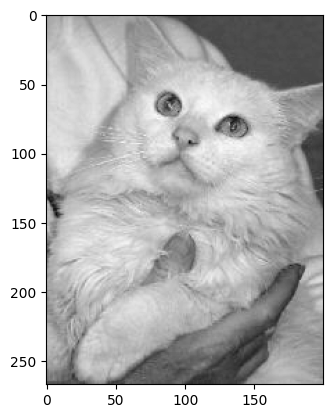

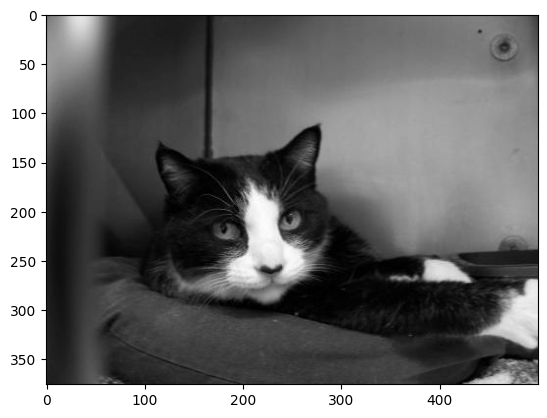

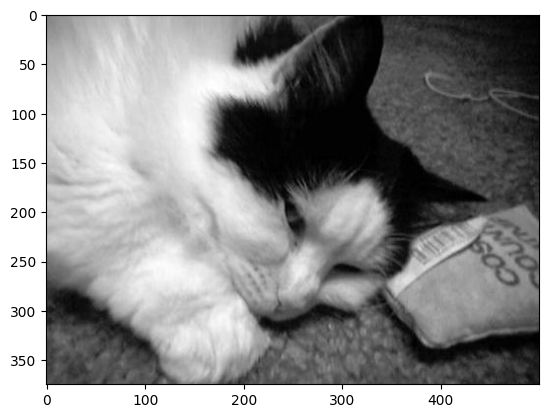

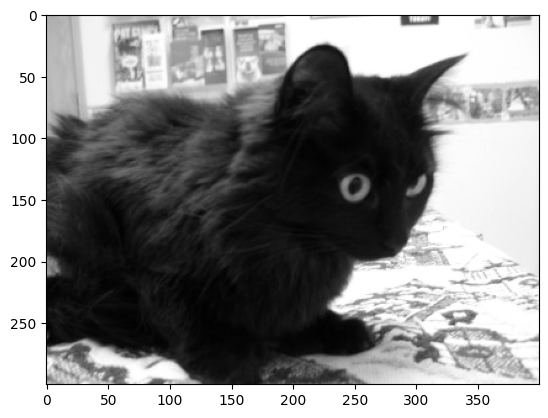

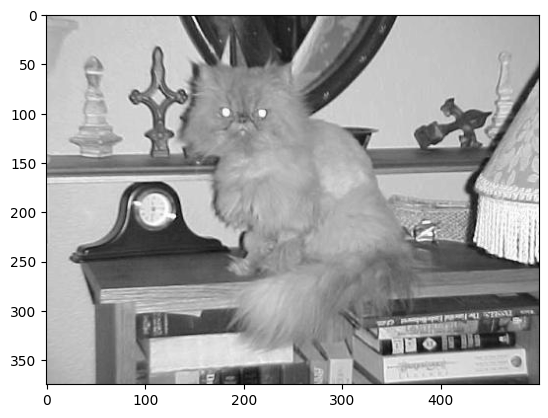

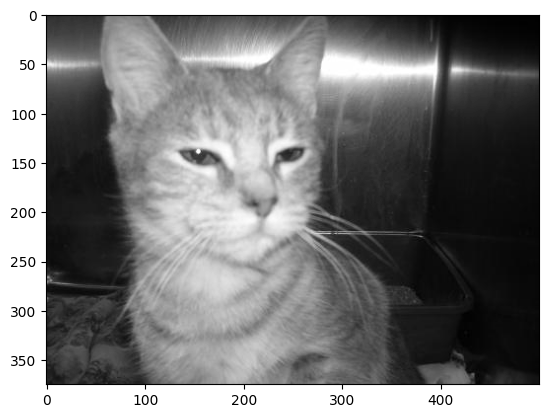

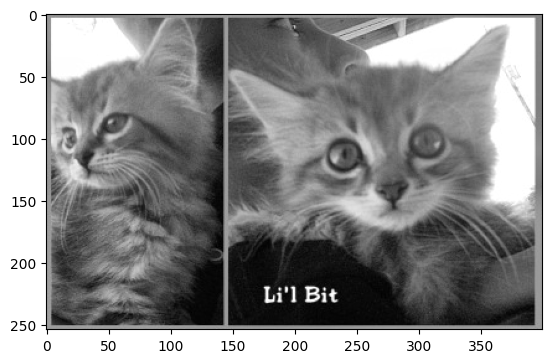

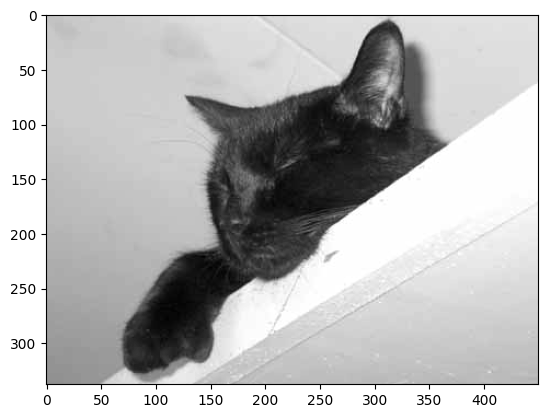

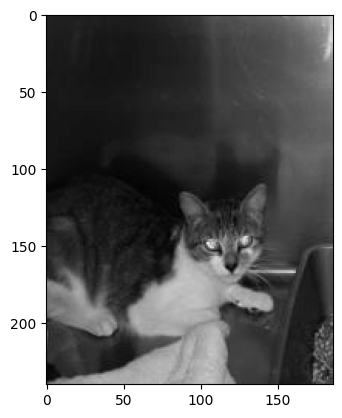

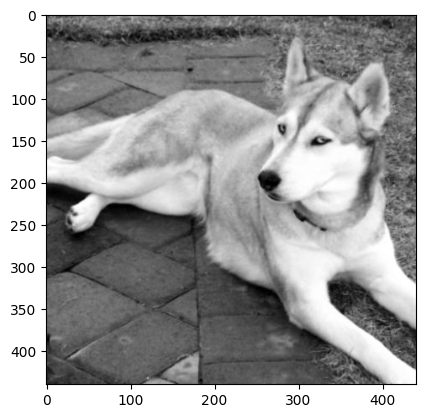

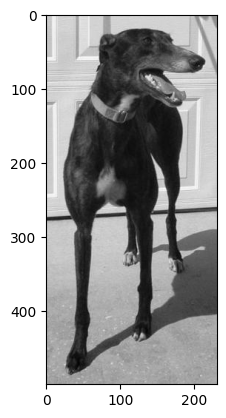

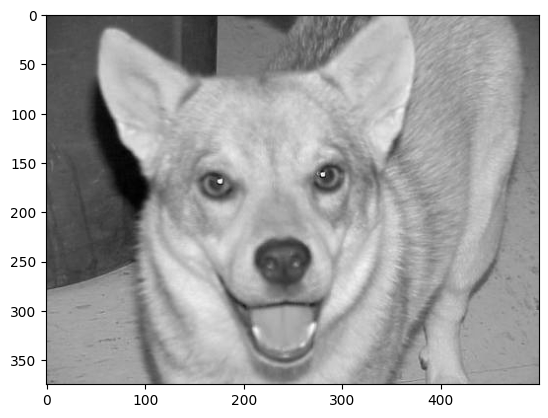

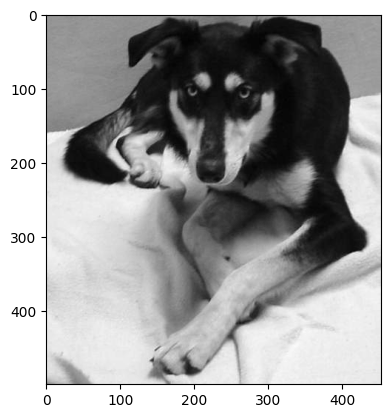

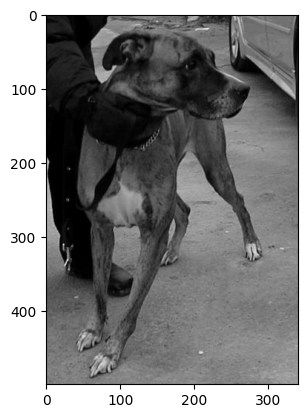

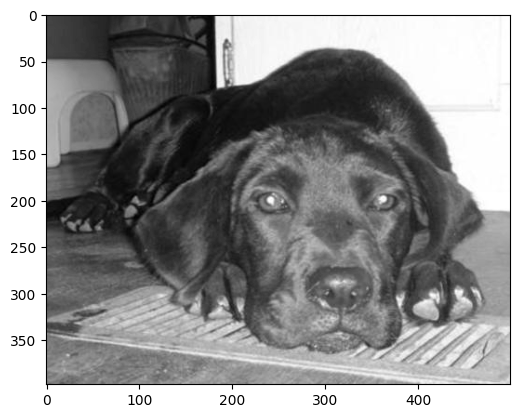

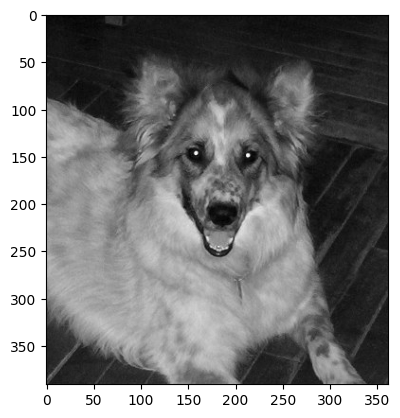

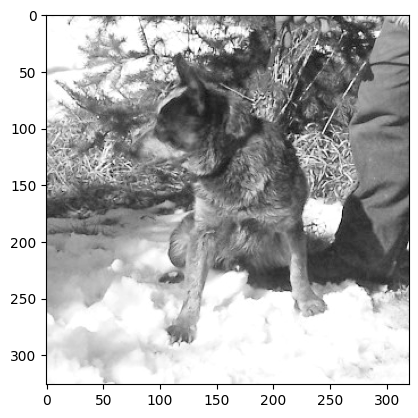

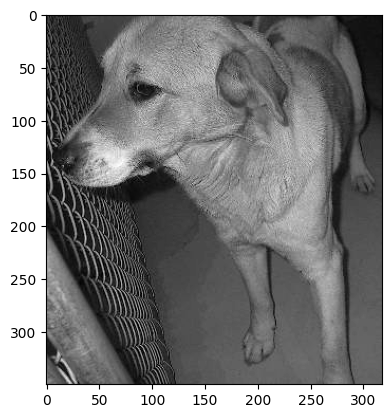

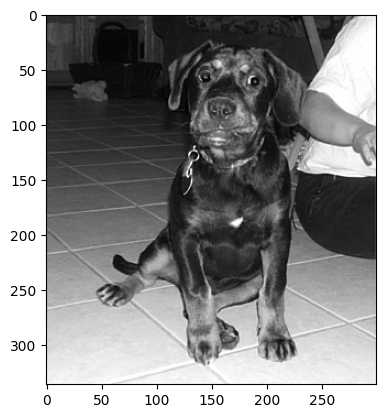

In [2]:
DATADIR = '/kaggle/input/pet-images/PetImages'
CATEGORIES = ['Cat' , 'Dog']
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    x=0
    for img in os.listdir(path):
        x+=1
        img_array = cv2.imread(os.path.join(path,img) , cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        if x==10:
            break

In [3]:
print(img_array)
print(img_array.shape)

[[ 44  43  41 ... 226 230 233]
 [ 44  47  46 ... 243 240 226]
 [ 45  51  53 ... 244 238 232]
 ...
 [246 248 245 ... 239 240 241]
 [250 249 247 ... 241 240 240]
 [253 249 247 ... 241 238 237]]
(336, 300)


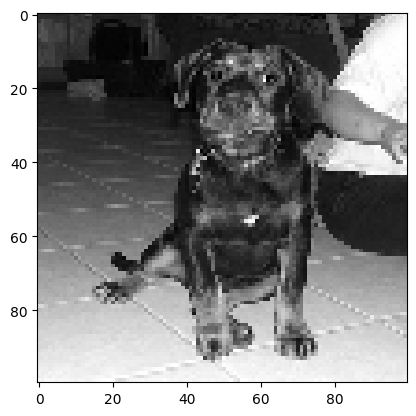

In [4]:
IMG_SIZE = 100
new_array= cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [5]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

100%|██████████| 2986/2986 [00:30<00:00, 96.48it/s]


In [6]:
print(training_data[:5])

[[array([[ 56,  57,  65, ...,  81,  44,  30],
       [161, 159, 164, ...,  39,  20,  12],
       [164, 165, 171, ...,  21,  13,  12],
       ...,
       [213, 208, 220, ...,  16,  55, 165],
       [205, 221, 232, ...,  61,  31, 134],
       [204, 220, 235, ...,  99,  20, 105]], dtype=uint8), 0], [array([[150, 154, 156, ...,  95,  95,  96],
       [155, 157, 158, ...,  95,  95,  95],
       [154, 157, 160, ...,  94,  95,  96],
       ...,
       [127, 128, 129, ..., 144, 145, 142],
       [122, 127, 132, ..., 155, 151, 143],
       [100, 102, 101, ..., 155, 151, 151]], dtype=uint8), 0], [array([[112, 129, 140, ...,  94,  81,  67],
       [121, 132, 144, ...,  96,  84,  68],
       [126, 136, 147, ...,  97,  86,  72],
       ...,
       [ 33,  33,  33, ..., 163,  91,  95],
       [ 32,  31,  33, ..., 135, 161, 124],
       [ 30,  31,  33, ..., 114, 155, 147]], dtype=uint8), 0], [array([[125, 134, 139, ...,   3,   1,   2],
       [127, 134, 138, ...,   6,   3,   2],
       [130, 132, 138,

In [7]:
print(training_data[500:510])

[[array([[194, 192, 198, ..., 163, 165, 165],
       [196, 197, 200, ..., 165, 165, 165],
       [196, 198, 200, ..., 166, 165, 165],
       ...,
       [148, 141, 151, ..., 140, 140, 140],
       [135, 143, 160, ..., 140, 122, 137],
       [139, 152, 159, ..., 135, 135, 133]], dtype=uint8), 0], [array([[ 56,  61,  61, ...,  39, 120,  70],
       [ 55,  60,  63, ...,  43, 122,  74],
       [ 55,  61,  63, ...,  44, 122,  75],
       ...,
       [125, 204, 214, ..., 188, 198, 192],
       [188, 210, 216, ..., 197, 188, 200],
       [198, 209, 210, ..., 194, 187, 197]], dtype=uint8), 0], [array([[100,  98,  98, ...,  80,  85,  86],
       [102,  97,  95, ...,  77,  82,  75],
       [101, 101, 102, ...,  76,  78,  74],
       ...,
       [187, 187, 189, ..., 111, 116, 112],
       [179, 176, 177, ..., 119, 118, 116],
       [180, 183, 173, ..., 127, 129, 128]], dtype=uint8), 0], [array([[  2,   7,  11, ...,  89,  22,  83],
       [  4,   8,  11, ...,  89,  21,  83],
       [  4,   9,  10,

In [8]:
import random 
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

1
0
0
0
1
1
1
0
0
0


In [9]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1 , IMG_SIZE , IMG_SIZE)
y = np.array(y)

In [10]:
X[:1]

array([[[ 69,  47,  48, ...,  42,  47, 123],
        [ 91,  47,  48, ...,  41,  47, 126],
        [122,  46,  48, ...,  45,  59, 119],
        ...,
        [221, 226, 224, ..., 165, 161, 159],
        [223, 223, 224, ..., 166, 162, 160],
        [225, 227, 222, ..., 168, 164, 159]]], dtype=uint8)

In [11]:
y[:1]

array([1])

In [12]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

In [13]:
from sklearn.model_selection import  train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.3 , random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4172, 100, 100)
(1788, 100, 100)
(4172,)
(1788,)


In [14]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(IMG_SIZE,IMG_SIZE)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
num_epochs = 50  # Set the number of epochs here
model.fit(X_train, y_train, epochs=num_epochs, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
 65/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4898 - loss: 87.8407

I0000 00:00:1717963864.737128      75 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


131/131 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.4971 - loss: 66.7841 - val_accuracy: 0.4972 - val_loss: 7.1742
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5211 - loss: 5.8315 - val_accuracy: 0.5028 - val_loss: 4.7896
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5212 - loss: 1.8889 - val_accuracy: 0.5028 - val_loss: 1.2639
Epoch 4/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5395 - loss: 0.8918 - val_accuracy: 0.5028 - val_loss: 1.1048
Epoch 5/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5646 - loss: 0.8471 - val_accuracy: 0.5073 - val_loss: 1.1592
Epoch 6/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5813 - loss: 0.7427 - val_accuracy: 0.5229 - val_loss: 0.9093
Epoch 7/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5966 - loss: 0.7095 - val_accuracy: 0.5028 - val_loss: 1.3758
Epoch 8/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5575 - loss: 1.1276 - val_accuracy: 0.5006 - va

In [18]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_acc:.4f}')

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4958 - loss: 0.6932
Test loss: 0.6932
Test accuracy: 0.4972


In [19]:
output = model.predict(X_test)
y_pred = np.argmax(output, axis=1)

56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67      1788
           1       0.00      0.00      0.00         0

    accuracy                           0.50      1788
   macro avg       0.50      0.25      0.33      1788
weighted avg       1.00      0.50      0.67      1788



In [21]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[899   0]
 [889   0]]
